In [1]:
import numpy as np
import scipy.ndimage as ndim
from astropy.wcs import WCS
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
HST_temp = pyfits.open('../archival_data/hla/F547M/hst_mos_0269685_wfc3_uvis_f547m_drz.fits')

In [7]:
hdu_temp = pyfits.PrimaryHDU(HST_temp[1].data, header=HST_temp[1].header)
hdu_temp.writeto('../temp.fits', overwrite=True)

In [29]:
from astropy.coordinates import Angle

In [31]:
from astropy import units as u

In [20]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
import astroalign as aa

In [3]:
def cropper(image, right, bottom, left, top):
        
    trim_1 = np.arange(right, len(image), 1)
    trim_2 = np.arange(bottom, len(image), 1)
    trim_3 = np.arange(0, left, 1)
    trim_4 = np.arange(0, top, 1)

    trimmed_1 = np.delete(image, trim_1, 1)
    trimmed_2 = np.delete(trimmed_1, trim_2, 0)
    trimmed_3 = np.delete(trimmed_2, trim_3, 1)
    trimmed_4 = np.delete(trimmed_3, trim_4, 0)
    
    return trimmed_4

In [17]:
def line(x0, x1, y0, y1, length):
    x, y = np.linspace(x0, x1, length), np.linspace(y0, y1, length)
    return x, y

In [12]:
def decdeg2dms(dd):
    mnt,sec = divmod(dd*3600,60)
    deg,mnt = divmod(mnt,60)
    return deg,mnt,sec

In [ ]:
def pos_angles(x_centre, y_centre, length):
    x_values = []
    y_values = []

    for i in range(10):
        x0 = x_centre - (length * np.cos(i * np.pi / 10)) # 18 degrees
        x1 = x_centre + (length * np.cos(i * np.pi / 10))
        y0 = y_centre - (length * np.sin(i * np.pi / 10))
        y1 = y_centre + (length * np.sin(i * np.pi / 10))
        
        x, y = line(x0, x1, y0, y1, 2*length)
        
        x_values.append(x)
        y_values.append(y)
    
    return x_values, y_values

# Calor Alto Data

In [16]:
CA_B = pyfits.getdata('../reduced_images/cropped/B.fits')
CA_V = pyfits.getdata('../reduced_images/cropped/V.fits')
CA_Ha = pyfits.getdata('../reduced_images/cropped/Ha.fits')

In [18]:
# Extract the values along the line, using cubic interpolation
x, y = line(0, 500, 250, 250, 500)
B_profile = ndim.map_coordinates(CA_B, np.vstack((x,y)))
V_profile = ndim.map_coordinates(CA_V, np.vstack((x,y)))
Ha_profile = ndim.map_coordinates(CA_Ha, np.vstack((x,y)))

/home/damien/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


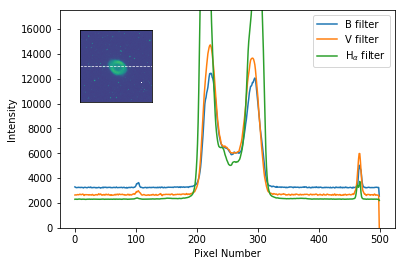

In [65]:
fig, ax = plt.subplots()

ax.plot(B_profile+2550, label='B filter')
ax.plot(V_profile, label='V filter')
ax.plot((Ha_profile*0.775)+2200, label=r'H$_{\alpha}$ filter')
plt.ylim(0, 17500)

inset = inset_axes(ax, width=1.0, height=1, loc=2, borderpad=2)
inset.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
inset.imshow(np.log10(CA_B))
inset.hlines(250, 0, 499, 'w', linestyles='--', linewidth=0.7)

ax.set_xlabel('Pixel Number')
ax.set_ylabel('Intensity')
ax.legend()
# plt.savefig('../calor_alto_data/comparison.png')

/home/damien/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log10


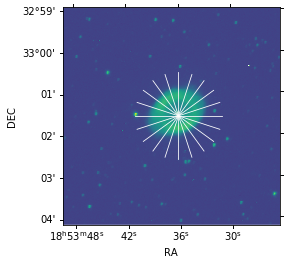

In [67]:
CA_V_w = WCS('../reduced_images/cropped/B_wcs.fits')

x_values = []
y_values = []

for i in range(10):
    x0 = 266 - (100 * np.cos(i * np.pi / 10)) # 18 degrees
    x1 = 266 + (100 * np.cos(i * np.pi / 10))
    y0 = 250 - (100 * np.sin(i * np.pi / 10))
    y1 = 250 + (100 * np.sin(i * np.pi / 10))
    x, y = line(x0,x1, y0, y1, 200)
    x_values.append(x)
    y_values.append(y)

fig = plt.figure()
fig.add_subplot(111, projection=CA_V_w[775:1275,750:1250])

plt.imshow(np.log10(CA_B), origin='lower', cmap=plt.cm.viridis)

for i in range(10):
    plt.plot(x_values[i], y_values[i], 'w', linewidth=0.8)

plt.xlabel('RA')
plt.ylabel('DEC')
plt.savefig('../calor_alto_data/position_angles.png')

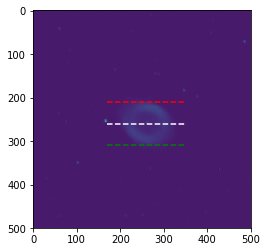

In [63]:
plt.imshow(CA_B)
plt.hlines(260,170,350, 'w', linestyles='--')
plt.hlines(210,170,350, 'r', linestyles='--')
plt.hlines(310,170,350, 'g', linestyles='--')
plt.savefig('../calor_alto_data/extent.png')

In [ ]:
CA_V_w = WCS('../reduced_images/cropped/V_wcs.fits')

## 210px

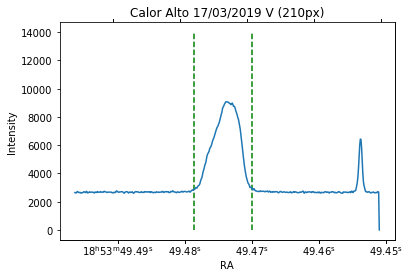

In [72]:
x, y = line(0, 500, 210, 210, 500)
V_profile = ndim.map_coordinates(CA_V, np.vstack((x,y)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=CA_V_w[775:1275,750:1250])
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(V_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(195, ymin=0, ymax=14000, color='g', linestyles='--')
plt.vlines(290, ymin=0, ymax=14000, color='g', linestyles='--')

plt.title('Calor Alto 17/03/2019 V (210px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/CA_210.png')

In [107]:
ring_210_0, dec = CA_V_w.wcs_pix2world(750+210, 775+195, 1)
ring_210_1, dec = CA_V_w.wcs_pix2world(750+210, 775+290, 1)

ring_210 = Angle(ring_210_0 - ring_210_1, u.degree)

print(ring_210.hms)

hms_tuple(h=0.0, m=0.0, s=0.0729431622039556)


## 220px

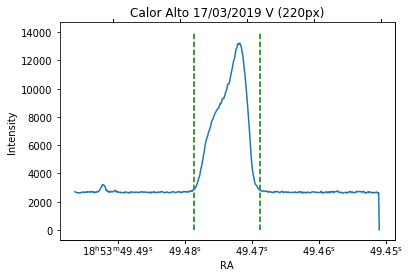

In [78]:
x, y = line(0, 500, 220, 220, 500)
V_profile = ndim.map_coordinates(CA_V, np.vstack((x,y)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=CA_V_w[775:1275,750:1250])
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(V_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(195, ymin=0, ymax=14000, color='g', linestyles='--')
plt.vlines(303, ymin=0, ymax=14000, color='g', linestyles='--')

plt.title('Calor Alto 17/03/2019 V (220px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/CA_220.png')

In [108]:
ring_220_0, dec = CA_V_w.wcs_pix2world(750+220, 775+195, 1)
ring_220_1, dec = CA_V_w.wcs_pix2world(750+220, 775+303, 1)

ring_220 = Angle(ring_220_0 - ring_220_1, u.degree)

print(ring_220.hms)

hms_tuple(h=0.0, m=0.0, s=0.08281676751266788)


## 230px

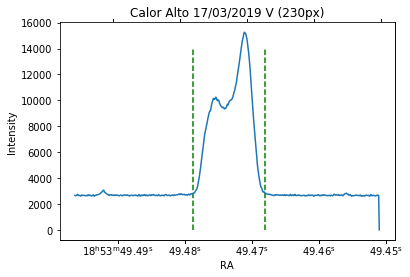

In [83]:
x, y = line(0, 500, 230, 230, 500)
V_profile = ndim.map_coordinates(CA_V, np.vstack((x,y)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=CA_V_w[775:1275,750:1250])
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(V_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(194, ymin=0, ymax=14000, color='g', linestyles='--')
plt.vlines(312, ymin=0, ymax=14000, color='g', linestyles='--')

plt.title('Calor Alto 17/03/2019 V (230px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/CA_230.png')

In [109]:
ring_230_0, dec = CA_V_w.wcs_pix2world(750+230, 775+194, 1)
ring_230_1, dec = CA_V_w.wcs_pix2world(750+230, 775+312, 1)

ring_230 = Angle(ring_230_0 - ring_230_1, u.degree)

print(ring_230.hms)

hms_tuple(h=0.0, m=0.0, s=0.09036778217250686)


## 240px

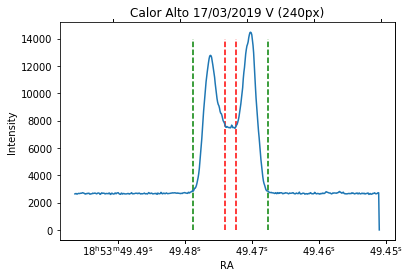

In [91]:
x, y = line(0, 500, 240, 240, 500)
V_profile = ndim.map_coordinates(CA_V, np.vstack((x,y)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=CA_V_w[775:1275,750:1250])
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(V_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(193, ymin=0, ymax=14000, color='g', linestyles='--')
plt.vlines(246, ymin=0, ymax=14000, color='r', linestyles='--')
plt.vlines(264, ymin=0, ymax=14000, color='r', linestyles='--')
plt.vlines(316, ymin=0, ymax=14000, color='g', linestyles='--')

plt.title('Calor Alto 17/03/2019 V (240px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/CA_240.png')

In [111]:
ring_240_0, dec = CA_V_w.wcs_pix2world(750+240, 775+193, 1)
ring_240_1, dec = CA_V_w.wcs_pix2world(750+240, 775+316, 1)

lobe_240_0, dec = CA_V_w.wcs_pix2world(750+240, 775+246, 1)
lobe_240_1, dec = CA_V_w.wcs_pix2world(750+240, 775+264, 1)

ring_240 = Angle(ring_240_0 - ring_240_1, u.degree)
lobe_240 = Angle(lobe_240_0 - lobe_240_1, u.degree)

print(ring_240.hms, lobe_240.hms)

hms_tuple(h=0.0, m=0.0, s=0.09407568323240414) hms_tuple(h=0.0, m=0.0, s=0.013767145878773592)


## 250px

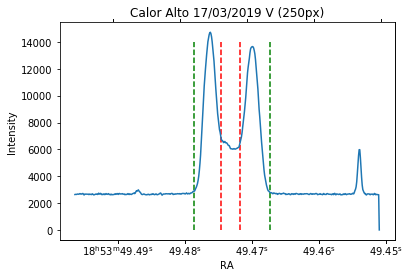

In [97]:
x, y = line(0, 500, 250, 250, 500)
V_profile = ndim.map_coordinates(CA_V, np.vstack((x,y)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=CA_V_w[775:1275,750:1250])
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(V_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(195, ymin=0, ymax=14000, color='g', linestyles='--')
plt.vlines(240, ymin=0, ymax=14000, color='r', linestyles='--')
plt.vlines(270, ymin=0, ymax=14000, color='r', linestyles='--')
plt.vlines(320, ymin=0, ymax=14000, color='g', linestyles='--')

plt.title('Calor Alto 17/03/2019 V (250px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/CA_250.png')

In [140]:
ring_250_0, dec = CA_V_w.wcs_pix2world(750+250, 970, 1)
ring_250_1, dec = CA_V_w.wcs_pix2world(750+250, 1095, 1)

lobe_250_0, dec = CA_V_w.wcs_pix2world(750+250, 1015, 1)
lobe_250_1, dec = CA_V_w.wcs_pix2world(750+250, 1045, 1)

ring_250 = Angle(ring_250_0 - ring_250_1, u.degree)
lobe_250 = Angle(lobe_250_0 - lobe_250_1, u.degree)

print(ring_250.hms, lobe_250.hms)

hms_tuple(h=0.0, m=0.0, s=0.09548159294809012) hms_tuple(h=0.0, m=0.0, s=0.022915807380741178)


## 260px

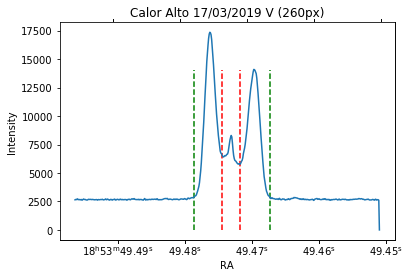

In [103]:
x, y = line(0, 500, 260, 260, 500)
V_profile = ndim.map_coordinates(CA_V, np.vstack((x,y)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=CA_V_w[775:1275,750:1250])
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(V_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(195, ymin=0, ymax=14000, color='g', linestyles='--')
plt.vlines(241, ymin=0, ymax=14000, color='r', linestyles='--')
plt.vlines(270, ymin=0, ymax=14000, color='r', linestyles='--')
plt.vlines(320, ymin=0, ymax=14000, color='g', linestyles='--')

plt.title('Calor Alto 17/03/2019 V (260px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/CA_260.png')

In [113]:
ring_260_0, dec = CA_V_w.wcs_pix2world(750+260, 775+195, 1)
ring_260_1, dec = CA_V_w.wcs_pix2world(750+260, 775+320, 1)

lobe_260_0, dec = CA_V_w.wcs_pix2world(750+260, 775+241, 1)
lobe_260_1, dec = CA_V_w.wcs_pix2world(750+260, 775+270, 1)

ring_260 = Angle(ring_260_0 - ring_260_1, u.degree)
lobe_260 = Angle(lobe_260_0 - lobe_260_1, u.degree)

print(ring_260.hms, lobe_260.hms)

hms_tuple(h=0.0, m=0.0, s=0.09535894470900531) hms_tuple(h=0.0, m=0.0, s=0.022123448939055386)


## 270px

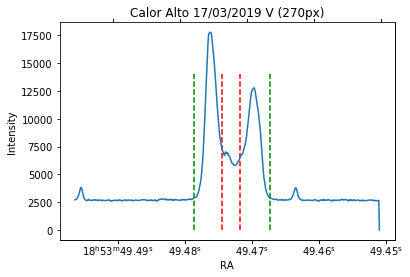

In [106]:
x, y = line(0, 500, 270, 270, 500)
V_profile = ndim.map_coordinates(CA_V, np.vstack((x,y)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=CA_V_w[775:1275,750:1250])
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(V_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(195, ymin=0, ymax=14000, color='g', linestyles='--')
plt.vlines(241, ymin=0, ymax=14000, color='r', linestyles='--')
plt.vlines(270, ymin=0, ymax=14000, color='r', linestyles='--')
plt.vlines(320, ymin=0, ymax=14000, color='g', linestyles='--')

plt.title('Calor Alto 17/03/2019 V (270px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/CA_270.png')

In [115]:
ring_270_0, dec = CA_V_w.wcs_pix2world(750+270, 775+195, 1)
ring_270_1, dec = CA_V_w.wcs_pix2world(750+270, 775+320, 1)

lobe_270_0, dec = CA_V_w.wcs_pix2world(750+270, 775+241, 1)
lobe_270_1, dec = CA_V_w.wcs_pix2world(750+270, 775+270, 1)

ring_270 = Angle(ring_270_0 - ring_270_1, u.degree)
lobe_270 = Angle(lobe_270_0 - lobe_270_1, u.degree)

print(ring_270.hms, lobe_270.hms)

hms_tuple(h=0.0, m=0.0, s=0.09523629603336306) hms_tuple(h=0.0, m=0.0, s=0.02209499421951478)


## 280px

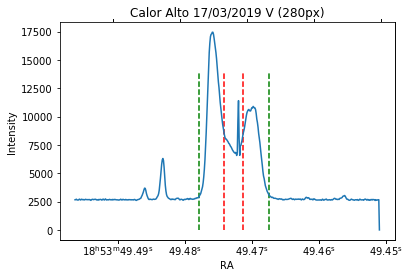

In [124]:
x, y = line(0, 500, 280, 280, 500)
V_profile = ndim.map_coordinates(CA_V, np.vstack((x,y)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=CA_V_w[775:1275,750:1250])
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(V_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(203, ymin=0, ymax=14000, color='g', linestyles='--')
plt.vlines(245, ymin=0, ymax=14000, color='r', linestyles='--')
plt.vlines(275, ymin=0, ymax=14000, color='r', linestyles='--')
plt.vlines(318, ymin=0, ymax=14000, color='g', linestyles='--')

plt.title('Calor Alto 17/03/2019 V (280px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/CA_280.png')

In [125]:
ring_280_0, dec = CA_V_w.wcs_pix2world(750+280, 775+203, 1)
ring_280_1, dec = CA_V_w.wcs_pix2world(750+280, 775+318, 1)

lobe_280_0, dec = CA_V_w.wcs_pix2world(750+280, 775+245, 1)
lobe_280_1, dec = CA_V_w.wcs_pix2world(750+280, 775+275, 1)

ring_280 = Angle(ring_280_0 - ring_280_1, u.degree)
lobe_280 = Angle(lobe_280_0 - lobe_280_1, u.degree)

print(ring_280.hms, lobe_280.hms)

hms_tuple(h=0.0, m=0.0, s=0.0875035222316001) hms_tuple(h=0.0, m=0.0, s=0.02282705043398892)


## 290px

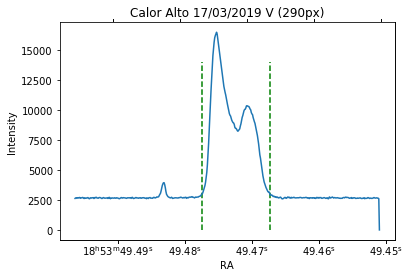

In [128]:
x, y = line(0, 500, 290, 290, 500)
V_profile = ndim.map_coordinates(CA_V, np.vstack((x,y)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=CA_V_w[775:1275,750:1250])
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(V_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(208, ymin=0, ymax=14000, color='g', linestyles='--')
plt.vlines(320, ymin=0, ymax=14000, color='g', linestyles='--')

plt.title('Calor Alto 17/03/2019 V (290px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/CA_290.png')

In [129]:
ring_290_0, dec = CA_V_w.wcs_pix2world(750+290, 775+208, 1)
ring_290_1, dec = CA_V_w.wcs_pix2world(750+290, 775+320, 1)

ring_290 = Angle(ring_290_0 - ring_290_1, u.degree)

print(ring_290.hms)

hms_tuple(h=0.0, m=0.0, s=0.08510975700119162)


## 300px

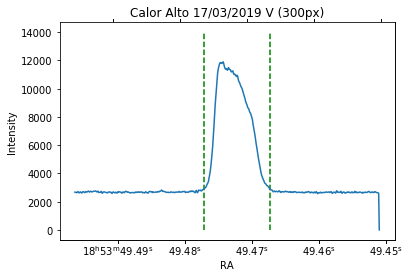

In [132]:
x, y = line(0, 500, 300, 300, 500)
V_profile = ndim.map_coordinates(CA_V, np.vstack((x,y)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=CA_V_w[775:1275,750:1250])
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(V_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(211, ymin=0, ymax=14000, color='g', linestyles='--')
plt.vlines(320, ymin=0, ymax=14000, color='g', linestyles='--')

plt.title('Calor Alto 17/03/2019 V (300px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/CA_300.png')

In [133]:
ring_300_0, dec = CA_V_w.wcs_pix2world(750+300, 775+211, 1)
ring_300_1, dec = CA_V_w.wcs_pix2world(750+300, 775+320, 1)

ring_300 = Angle(ring_300_0 - ring_300_1, u.degree)

print(ring_300.hms)

hms_tuple(h=0.0, m=0.0, s=0.08272259516616035)


## 310px

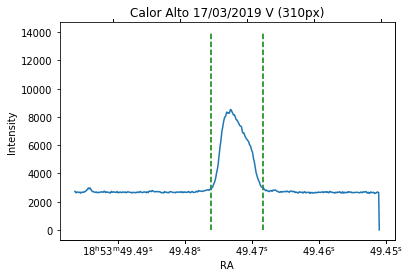

In [137]:
x, y = line(0, 500, 310, 310, 500)
V_profile = ndim.map_coordinates(CA_V, np.vstack((x,y)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=CA_V_w[775:1275,750:1250])
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(V_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(223, ymin=0, ymax=14000, color='g', linestyles='--')
plt.vlines(308, ymin=0, ymax=14000, color='g', linestyles='--')

plt.title('Calor Alto 17/03/2019 V (310px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/CA_310.png')

In [138]:
ring_310_0, dec = CA_V_w.wcs_pix2world(750+310, 775+223, 1)
ring_310_1, dec = CA_V_w.wcs_pix2world(750+310, 775+308, 1)

ring_310 = Angle(ring_310_0 - ring_310_1, u.degree)

print(ring_310.hms)

hms_tuple(h=0.0, m=0.0, s=0.06442504590268074)


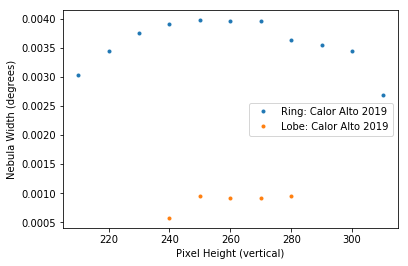

In [253]:
pixels = np.arange(210, 311, 10)

ring_widths = [ring_210.ddeg, ring_220.ddeg, ring_230.ddeg,
               ring_240.ddeg, ring_250.ddeg, ring_260.ddeg,
               ring_270.ddeg, ring_280.ddeg, ring_290.ddeg,
               ring_300.ddeg, ring_310.ddeg]

lobe_widths = [lobe_240.ddeg, lobe_250.ddeg, lobe_260.ddeg,
               lobe_270.ddeg, lobe_280.ddeg]

plt.plot(pixels, ring_widths, '.', label='Ring: Calor Alto 2019')
plt.plot(pixels[3:8], lobe_widths, '.', label='Lobe: Calor Alto 2019')
plt.xlabel('Pixel Height (vertical)')
plt.ylabel('Nebula Width (degrees)')
plt.legend()
plt.savefig('../line_profiles/comparison.png')

In [345]:
np.savetxt('CA_ring.txt', ring_widths)
np.savetxt('CA_lode.txt', lobe_widths)

# Teide Archival Data

In [5]:
TD_B = pyfits.getdata('../archival_data/iac80/Ring Nebula/2010-03-12/B/O100311_0250.fits')
TD_V = pyfits.getdata('../archival_data/iac80/Ring Nebula/2010-03-12/V/O100311_0246.fits')

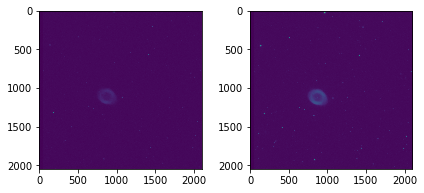

In [165]:
plt.subplot(1,2,1)
plt.imshow(np.log10(TD_B))
plt.subplot(1,2,2)
plt.imshow(np.log10(TD_V))
plt.tight_layout()

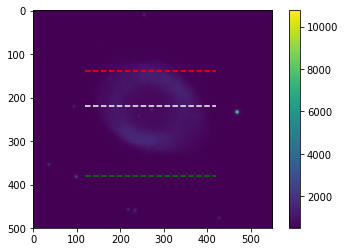

In [204]:
TD_V_crop = cropper(TD_V, 1100, 1400, 600, 900)
plt.imshow(TD_V_crop)
plt.hlines(140,120,420, 'r', linestyles='--')
plt.hlines(220,120,420, 'w', linestyles='--')
plt.hlines(380,120,420, 'g', linestyles='--')
plt.colorbar()

In [8]:
TD_V_w = WCS('../archival_data/iac80/Ring Nebula/2010-03-12/V/O100311_0246_wcs.fits')

## 120px

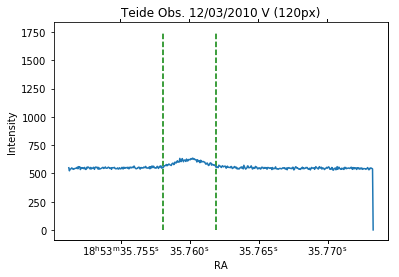

In [195]:
x_TD, y_TD = line(0, 500, 140, 140, 500)
V_TD_profile = ndim.map_coordinates(TD_V_crop, np.vstack((x_TD,y_TD)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=TD_V_w[600:1100,900:1400])
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(V_TD_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(155, ymin=0, ymax=1749, color='g', linestyles='--')
plt.vlines(242, ymin=0, ymax=1749, color='g', linestyles='--')
plt.title('Teide Obs. 12/03/2010 V (120px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/TD_120.png')

## 140px

## 160px

## 180 px

## 200px

## 220px

## 240px

## 260px

Text(0, 0.5, 'Intensity')

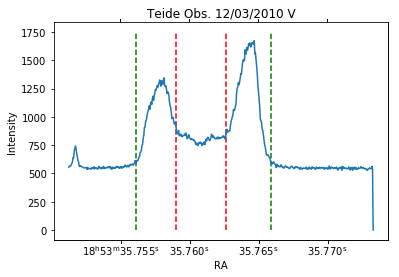

In [45]:
x_TD, y_TD = line(0, 500, 250, 250, 500)
V_TD_profile = ndim.map_coordinates(TD_V_crop, np.vstack((x_TD,y_TD)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=TD_V_w[600:1100,900:1400])
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(V_TD_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(110, ymin=0, ymax=1749, color='g', linestyles='--')
plt.vlines(175, ymin=0, ymax=1749, color='r', linestyles='--')
plt.vlines(258, ymin=0, ymax=1749, color='r', linestyles='--')
plt.vlines(332, ymin=0, ymax=1749, color='g', linestyles='--')

plt.title('Teide Obs. 12/03/2010 V')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
# plt.savefig('../line_profiles/TD_1.png')

In [35]:
ring_0, dec = TD_V_w.wcs_pix2world(1150, 710, 1)
ring_1, dec = TD_V_w.wcs_pix2world(1150, 932, 1)

lobe_0, dec = TD_V_w.wcs_pix2world(1150, 775, 1)
lobe_1, dec = TD_V_w.wcs_pix2world(1150, 858, 1)

ring = Angle(ring_1 - ring_0, u.degree)
lobe = Angle(lobe_1 - lobe_0, u.degree)

print(ring.hms, lobe.hms)

hms_tuple(h=0.0, m=0.0, s=0.009523530798105643) hms_tuple(h=0.0, m=0.0, s=0.0035605685525297312)


## 280px

## 300px

## 320px

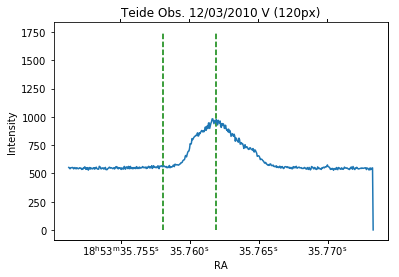

In [187]:
x_TD, y_TD = line(0, 500, 380, 380, 500)
V_TD_profile = ndim.map_coordinates(TD_V_crop, np.vstack((x_TD,y_TD)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=TD_V_w[600:1100,900:3200])
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(V_TD_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(155, ymin=0, ymax=1749, color='g', linestyles='--')
plt.vlines(242, ymin=0, ymax=1749, color='g', linestyles='--')

plt.title('Teide Obs. 12/03/2010 V (120px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/TD_120.png')

# HST Archive Data

## 19/09/2011

In [8]:
HST_f547m = pyfits.open('../archival_data/hla/F547M/hst_12309_01_wfc3_uvis_f547m_drz.fits')

/home/damien/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/home/damien/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


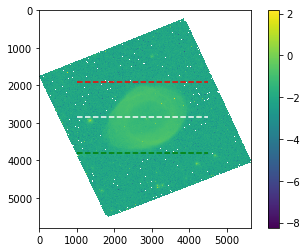

In [280]:
plt.imshow(np.log10(HST_f547m[1].data))
plt.hlines(1900,1000,4500, 'r', linestyles='--')
plt.hlines(2850,1000,4500, 'w', linestyles='--')
plt.hlines(3800,1000,4500, 'g', linestyles='--')
plt.colorbar()

In [25]:
len(HST_Ha)

5800

In [230]:
HST_11_w = WCS(HST_f547m[1].header)

## 1900px

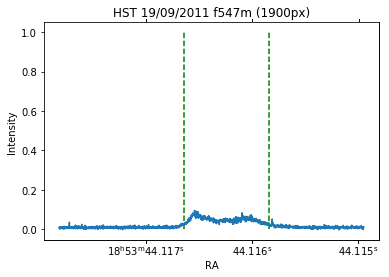

In [237]:
x_HST_11, y_HST_11 = line(0, 5800, 1900, 1900, 5800)
f547_HST_11_profile = ndim.map_coordinates(HST_f547m[1].data, np.vstack((x_HST_11,y_HST_11)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=HST_11_w)
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(f547_HST_11_profile[1500:4500])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(1230, ymin=0, ymax=1, color='g', linestyles='--')
plt.vlines(2070, ymin=0, ymax=1, color='g', linestyles='--')

plt.title('HST 19/09/2011 f547m (1900px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/HST_11_1900.png')

In [239]:
ring_1900_0, dec = HST_11_w.wcs_pix2world(1900, 1230, 1)
ring_1900_1, dec = HST_11_w.wcs_pix2world(1900, 2070, 1)

ring_1900 = Angle(ring_1900_1 - ring_1900_0, u.degree)

print(ring_1900.hms)

hms_tuple(h=0.0, m=0.0, s=0.00030659005915367754)


## 2090px

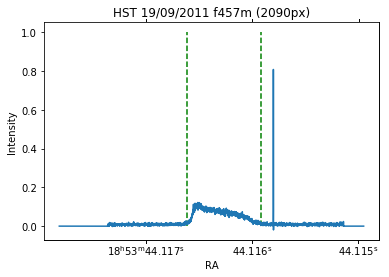

In [243]:
x_HST_11, y_HST_11 = line(0, 5800, 2090, 2090, 5800)
f656_HST_11_profile = ndim.map_coordinates(HST_f547m[1].data, np.vstack((x_HST_11,y_HST_11)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=HST_11_w)
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(f656_HST_11_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(2425, ymin=0, ymax=1, color='g', linestyles='--')
plt.vlines(3850, ymin=0, ymax=1, color='g', linestyles='--')

plt.title('HST 19/09/2011 f457m (2090px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/HST_11_2090.png')

In [245]:
ring_2090_0, dec = HST_11_w.wcs_pix2world(2090, 2425, 1)
ring_2090_1, dec = HST_11_w.wcs_pix2world(2090, 3850, 1)

ring_2090 = Angle(ring_2090_1 - ring_2090_0, u.degree)

print(ring_2090.hms)

hms_tuple(h=0.0, m=0.0, s=0.00041377417801413696)


## 2280px

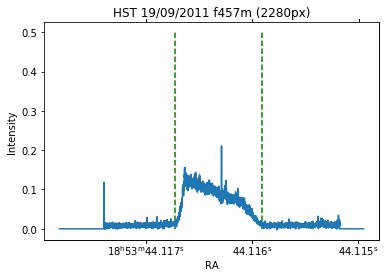

In [258]:
x_HST_11, y_HST_11 = line(0, 5800, 2280, 2280, 5800)
f656_HST_11_profile = ndim.map_coordinates(HST_f547m[1].data, np.vstack((x_HST_11,y_HST_11)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=HST_11_w)
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(f656_HST_11_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(2200, ymin=0, ymax=0.5, color='g', linestyles='--')
plt.vlines(3870, ymin=0, ymax=0.5, color='g', linestyles='--')

plt.title('HST 19/09/2011 f457m (2280px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/HST_11_2280.png')

In [259]:
ring_2280_0, dec = HST_11_w.wcs_pix2world(2280, 2200, 1)
ring_2280_1, dec = HST_11_w.wcs_pix2world(2280, 3870, 1)

ring_2280 = Angle(ring_2280_1 - ring_2280_0, u.degree)

print(ring_2280.hms)

hms_tuple(h=0.0, m=0.0, s=0.0003600626587285661)


## 2470px

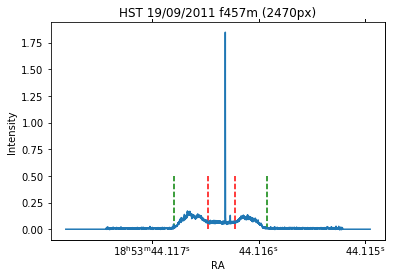

In [271]:
x_HST_11, y_HST_11 = line(0, 5800, 2470, 2470, 5800)
f656_HST_11_profile = ndim.map_coordinates(HST_f547m[1].data, np.vstack((x_HST_11,y_HST_11)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=HST_11_w)
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(f656_HST_11_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(2070, ymin=0, ymax=0.5, color='g', linestyles='--')
plt.vlines(2700, ymin=0, ymax=0.5, color='r', linestyles='--')
plt.vlines(3230, ymin=0, ymax=0.5, color='r', linestyles='--')
plt.vlines(3830, ymin=0, ymax=0.5, color='g', linestyles='--')

plt.title('HST 19/09/2011 f457m (2470px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/HST_11_2470.png')

In [282]:
ring_2470_0, dec = HST_11_w.wcs_pix2world(2470, 2070, 1)
ring_2470_1, dec = HST_11_w.wcs_pix2world(2470, 3830, 1)

lobe_2470_0, dec = HST_11_w.wcs_pix2world(2470, 2700, 1)
lobe_2470_1, dec = HST_11_w.wcs_pix2world(2470, 3230, 1)

ring_2470 = Angle(ring_2470_1 - ring_2470_0, u.degree)
lobe_2470 = Angle(lobe_2470_1 - lobe_2470_0, u.degree)

print(ring_2470.hms, lobe_2470.hms)

hms_tuple(h=0.0, m=0.0, s=0.0002478948545103777) hms_tuple(h=0.0, m=0.0, s=7.465043836418773e-05)


## 2660px

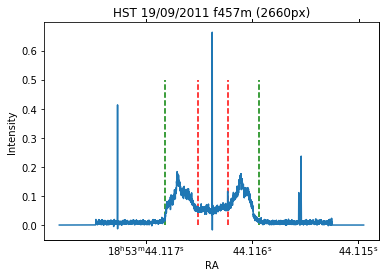

In [277]:
x_HST_11, y_HST_11 = line(0, 5800, 2660, 2660, 5800)
f656_HST_11_profile = ndim.map_coordinates(HST_f547m[1].data, np.vstack((x_HST_11,y_HST_11)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=HST_11_w)
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(f656_HST_11_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(2010, ymin=0, ymax=0.5, color='g', linestyles='--')
plt.vlines(2650, ymin=0, ymax=0.5, color='r', linestyles='--')
plt.vlines(3210, ymin=0, ymax=0.5, color='r', linestyles='--')
plt.vlines(3800, ymin=0, ymax=0.5, color='g', linestyles='--')

plt.title('HST 19/09/2011 f457m (2660px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/HST_11_2660.png')

In [279]:
ring_2660_0, dec = HST_11_w.wcs_pix2world(2660, 2010, 1)
ring_2660_1, dec = HST_11_w.wcs_pix2world(2660, 3800, 1)

lobe_2660_0, dec = HST_11_w.wcs_pix2world(2660, 2650, 1)
lobe_2660_1, dec = HST_11_w.wcs_pix2world(2660, 3210, 1)

ring_2660 = Angle(ring_2660_1 - ring_2660_0, u.degree)
lobe_2660 = Angle(lobe_2660_1 - lobe_2660_0, u.degree)

print(ring_2660.hms, lobe_2660.hms)

hms_tuple(h=0.0, m=0.0, s=0.0001183121321446379) hms_tuple(h=0.0, m=0.0, s=3.7014069675933576e-05)


## 2850px

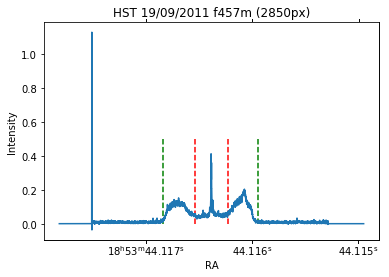

In [285]:
x_HST_11, y_HST_11 = line(0, 5800, 2850, 2850, 5800)
f656_HST_11_profile = ndim.map_coordinates(HST_f547m[1].data, np.vstack((x_HST_11,y_HST_11)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=HST_11_w)
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(f656_HST_11_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(1970, ymin=0, ymax=0.5, color='g', linestyles='--')
plt.vlines(2580, ymin=0, ymax=0.5, color='r', linestyles='--')
plt.vlines(3210, ymin=0, ymax=0.5, color='r', linestyles='--')
plt.vlines(3780, ymin=0, ymax=0.5, color='g', linestyles='--')

plt.title('HST 19/09/2011 f457m (2850px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/HST_11_2850.png')

In [303]:
ring_2850_0, dec = HST_11_w.wcs_pix2world(2850, 1970, 1)
ring_2850_1, dec = HST_11_w.wcs_pix2world(2850, 3780, 1)

lobe_2850_0, dec = HST_11_w.wcs_pix2world(2850, 2580, 1)
lobe_2850_1, dec = HST_11_w.wcs_pix2world(2850, 3210, 1)

ring_2850 = Angle(ring_2850_0 - ring_2850_1, u.degree)
lobe_2850 = Angle(lobe_2850_0 - lobe_2850_1, u.degree)

print(ring_2850.hms, lobe_2850.hms)

hms_tuple(h=0.0, m=0.0, s=1.5666246326873082e-05) hms_tuple(h=0.0, m=0.0, s=5.452916411741172e-06)


## 3040px

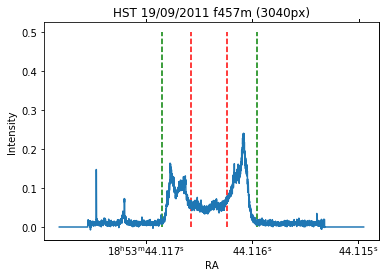

In [299]:
x_HST_11, y_HST_11 = line(0, 5800, 3040, 3040, 5800)
f656_HST_11_profile = ndim.map_coordinates(HST_f547m[1].data, np.vstack((x_HST_11,y_HST_11)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=HST_11_w)
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(f656_HST_11_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(1950, ymin=0, ymax=0.5, color='g', linestyles='--')
plt.vlines(2500, ymin=0, ymax=0.5, color='r', linestyles='--')
plt.vlines(3200, ymin=0, ymax=0.5, color='r', linestyles='--')
plt.vlines(3770, ymin=0, ymax=0.5, color='g', linestyles='--')

plt.title('HST 19/09/2011 f457m (3040px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/HST_11_3040.png')

In [301]:
ring_3040_0, dec = HST_11_w.wcs_pix2world(3040, 1950, 1)
ring_3040_1, dec = HST_11_w.wcs_pix2world(3040, 3770, 1)

lobe_3040_0, dec = HST_11_w.wcs_pix2world(3040, 2500, 1)
lobe_3040_1, dec = HST_11_w.wcs_pix2world(3040, 3200, 1)

ring_3040 = Angle(ring_3040_0 - ring_3040_1, u.degree)
lobe_3040 = Angle(lobe_3040_0 - lobe_3040_1, u.degree)

print(ring_3040.hms, lobe_3040.hms)

hms_tuple(h=0.0, m=0.0, s=0.000151799144987308) hms_tuple(h=0.0, m=0.0, s=5.838413017045242e-05)


## 3230px

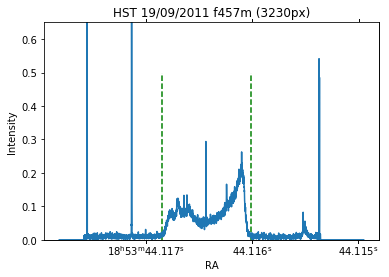

In [311]:
x_HST_11, y_HST_11 = line(0, 5800, 3230, 3230, 5800)
f656_HST_11_profile = ndim.map_coordinates(HST_f547m[1].data, np.vstack((x_HST_11,y_HST_11)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=HST_11_w)
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(f656_HST_11_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(1950, ymin=0, ymax=0.5, color='g', linestyles='--')
plt.vlines(3660, ymin=0, ymax=0.5, color='g', linestyles='--')

plt.ylim(0, 0.65)

plt.title('HST 19/09/2011 f457m (3230px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/HST_11_3230.png')

In [312]:
ring_3230_0, dec = HST_11_w.wcs_pix2world(3230, 1950, 1)
ring_3230_1, dec = HST_11_w.wcs_pix2world(3230, 3660, 1)

ring_3230 = Angle(ring_3230_0 - ring_3230_1, u.degree)

print(ring_3230.hms)

hms_tuple(h=0.0, m=0.0, s=0.0002704445614654106)


## 3420px

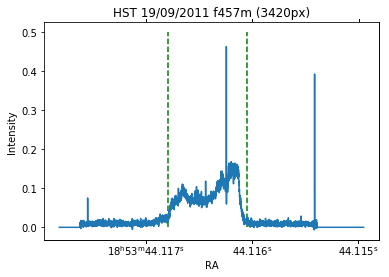

In [318]:
x_HST_11, y_HST_11 = line(0, 5800, 3420, 3420, 5800)
f656_HST_11_profile = ndim.map_coordinates(HST_f547m[1].data, np.vstack((x_HST_11,y_HST_11)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=HST_11_w)
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(f656_HST_11_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(2075, ymin=0, ymax=0.5, color='g', linestyles='--')
plt.vlines(3580, ymin=0, ymax=0.5, color='g', linestyles='--')

# plt.ylim(0, 0.65)

plt.title('HST 19/09/2011 f457m (3420px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/HST_11_3420.png')

In [319]:
ring_3420_0, dec = HST_11_w.wcs_pix2world(3420, 2075, 1)
ring_3420_1, dec = HST_11_w.wcs_pix2world(3420, 3580, 1)

ring_3420 = Angle(ring_3420_0 - ring_3420_1, u.degree)

print(ring_3420.hms)

hms_tuple(h=0.0, m=0.0, s=0.00035052318253292475)


## 3610px

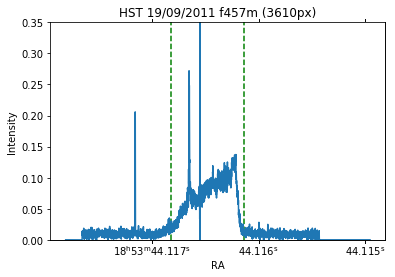

In [325]:
x_HST_11, y_HST_11 = line(0, 5800, 3610, 3610, 5800)
f656_HST_11_profile = ndim.map_coordinates(HST_f547m[1].data, np.vstack((x_HST_11,y_HST_11)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=HST_11_w)
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(f656_HST_11_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(2000, ymin=0, ymax=0.5, color='g', linestyles='--')
plt.vlines(3400, ymin=0, ymax=0.5, color='g', linestyles='--')

plt.ylim(0, 0.35)

plt.title('HST 19/09/2011 f457m (3610px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/HST_11_3610.png')

In [326]:
ring_3610_0, dec = HST_11_w.wcs_pix2world(3610, 2000, 1)
ring_3610_1, dec = HST_11_w.wcs_pix2world(3610, 3400, 1)

ring_3610 = Angle(ring_3610_0 - ring_3610_1, u.degree)

print(ring_3610.hms)

hms_tuple(h=0.0, m=0.0, s=0.00043070457195426576)


## 3800px

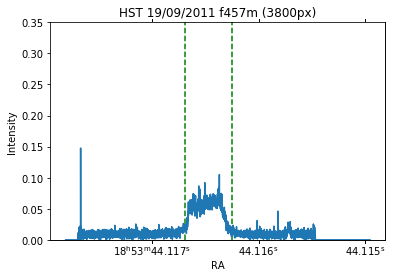

In [331]:
x_HST_11, y_HST_11 = line(0, 5800, 3800, 3800, 5800)
f656_HST_11_profile = ndim.map_coordinates(HST_f547m[1].data, np.vstack((x_HST_11,y_HST_11)))

fig = plt.figure()
ax = fig.add_subplot(111, projection=HST_11_w)
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

bx = fig.add_subplot(111)
plt.plot(f656_HST_11_profile)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.vlines(2275, ymin=0, ymax=0.5, color='g', linestyles='--')
plt.vlines(3175, ymin=0, ymax=0.5, color='g', linestyles='--')

plt.ylim(0, 0.35)

plt.title('HST 19/09/2011 f457m (3800px)')
plt.xlabel('RA', labelpad=20)
plt.ylabel('Intensity')
plt.savefig('../line_profiles/HST_11_3800.png')

In [332]:
ring_3800_0, dec = HST_11_w.wcs_pix2world(3800, 2275, 1)
ring_3800_1, dec = HST_11_w.wcs_pix2world(3800, 3175, 1)

ring_3800 = Angle(ring_3800_0 - ring_3800_1, u.degree)

print(ring_3800.hms)

hms_tuple(h=0.0, m=0.0, s=0.00034415666050335863)


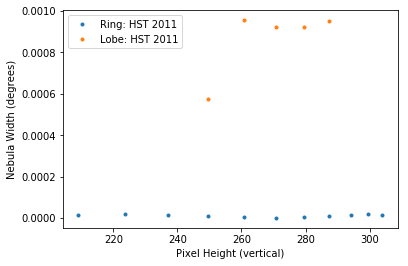

In [341]:
HST_pixels = np.arange(1900, 3801, 190)
scale = np.linspace(0.11, 0.08, 11)

HST_ring_widths = [ring_1900.ddeg, ring_2090.ddeg, ring_2280.ddeg,
                   ring_2470.ddeg, ring_2660.ddeg, ring_2850.ddeg,
                   ring_3040.ddeg, ring_3230.ddeg, ring_3420.ddeg,
                   ring_3610.ddeg, ring_3800.ddeg]

HST_lobe_widths = [lobe_2470.ddeg, lobe_2660.ddeg,
               lobe_2850.ddeg, lobe_3040.ddeg]

# plt.plot(pixels, ring_widths, '.', label='Ring: Calor Alto 2019')
# plt.plot(pixels[3:8], lobe_widths, '.', label='Lobe: Calor Alto 2019')
plt.plot(HST_pixels*scale, HST_ring_widths, '.', label='Ring: HST 2011')
plt.plot(HST_pixels[3:8]*scale[3:8], lobe_widths, '.', label='Lobe: HST 2011')
plt.xlabel('Pixel Height (vertical)')
plt.ylabel('Nebula Width (degrees)')
plt.legend()
plt.savefig('../line_profiles/comparison_2.png')

In [346]:
np.savetxt('HST_ring.txt', HST_ring_widths)
np.savetxt('HST_lode.txt', HST_lobe_widths)

In [344]:
HST_f547m[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5656                                                  
NAXIS2  =                 5800                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'ibh601c6q                         ' / rootname of the observation set
EXPNAME = 'ibh601c6q                ' / exposure identifier                     
BUNIT   = 'ELECTRONS/S'     